In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("california_housing_prices.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
train_data = X_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2035,-119.74,36.73,42.0,1236.0,272.0,946.0,261.0,2.0536,INLAND,50000.0
7633,-118.29,33.84,34.0,2617.0,558.0,1396.0,515.0,5.0610,<1H OCEAN,218000.0
19037,-121.99,38.36,35.0,2728.0,451.0,1290.0,452.0,3.2768,INLAND,117600.0
15399,-117.20,33.20,16.0,4409.0,629.0,1875.0,609.0,5.5430,<1H OCEAN,286400.0
2719,-115.48,32.80,21.0,1260.0,246.0,805.0,239.0,2.6172,INLAND,88500.0
...,...,...,...,...,...,...,...,...,...,...
6726,-118.11,34.12,52.0,2954.0,371.0,1152.0,347.0,11.5609,<1H OCEAN,500001.0
3315,-122.78,38.97,11.0,5175.0,971.0,2144.0,792.0,3.0466,INLAND,97300.0
13400,-117.43,34.12,7.0,5954.0,1071.0,3567.0,1070.0,3.2056,INLAND,134100.0
17045,-122.27,37.48,26.0,3542.0,507.0,1392.0,524.0,8.5184,NEAR OCEAN,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

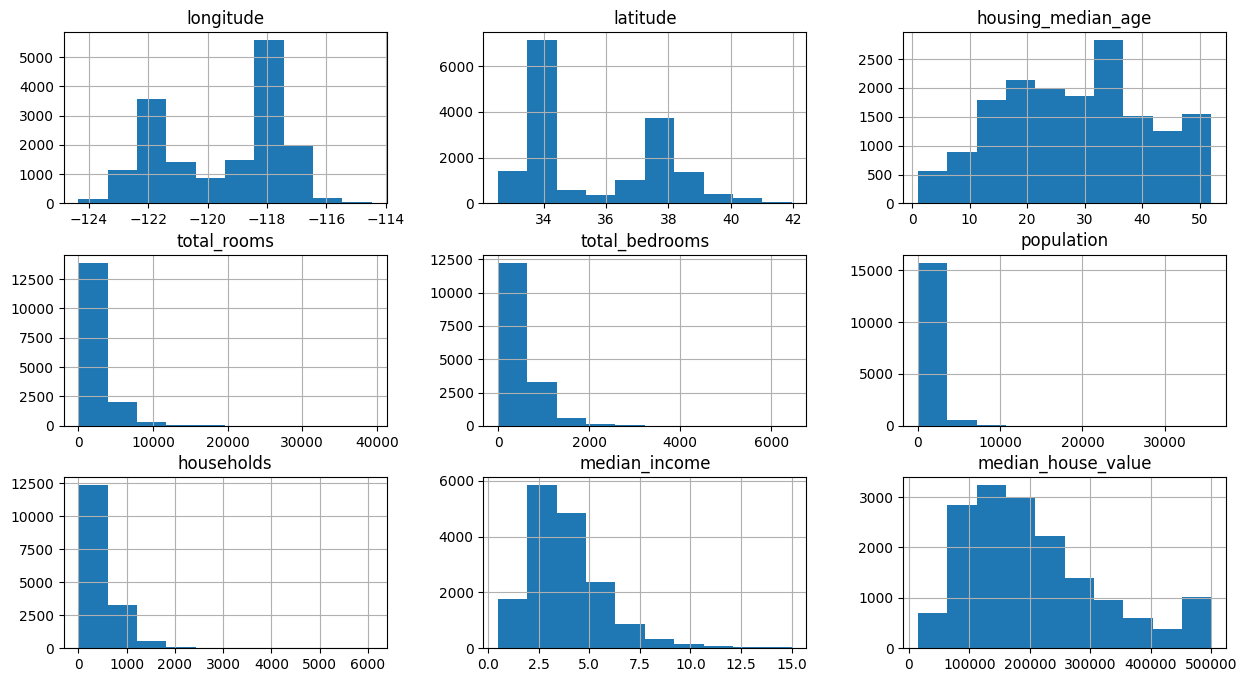

In [14]:
train_data.hist(figsize=(15, 8))

In [15]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924447,-0.110723,0.045529,0.068641,0.099407,0.056448,-0.012162,-0.041755
latitude,-0.924447,1.000000,0.013491,-0.038137,-0.068025,-0.110476,-0.073824,-0.083473,-0.147519
housing_median_age,-0.110723,0.013491,1.000000,-0.364606,-0.324112,-0.299240,-0.306378,-0.113151,0.113308
total_rooms,0.045529,-0.038137,-0.364606,1.000000,0.929839,0.853160,0.918142,0.195167,0.131374
total_bedrooms,0.068641,-0.068025,-0.324112,0.929839,1.000000,0.874692,0.979318,-0.011252,0.047290
population,0.099407,-0.110476,-0.299240,0.853160,0.874692,1.000000,0.904583,0.002075,-0.029418
households,0.056448,-0.073824,-0.306378,0.918142,0.979318,0.904583,1.000000,0.010381,0.061752
median_income,-0.012162,-0.083473,-0.113151,0.195167,-0.011252,0.002075,0.010381,1.000000,0.688642
median_house_value,-0.041755,-0.147519,0.113308,0.131374,0.047290,-0.029418,0.061752,0.688642,1.000000


<Axes: >

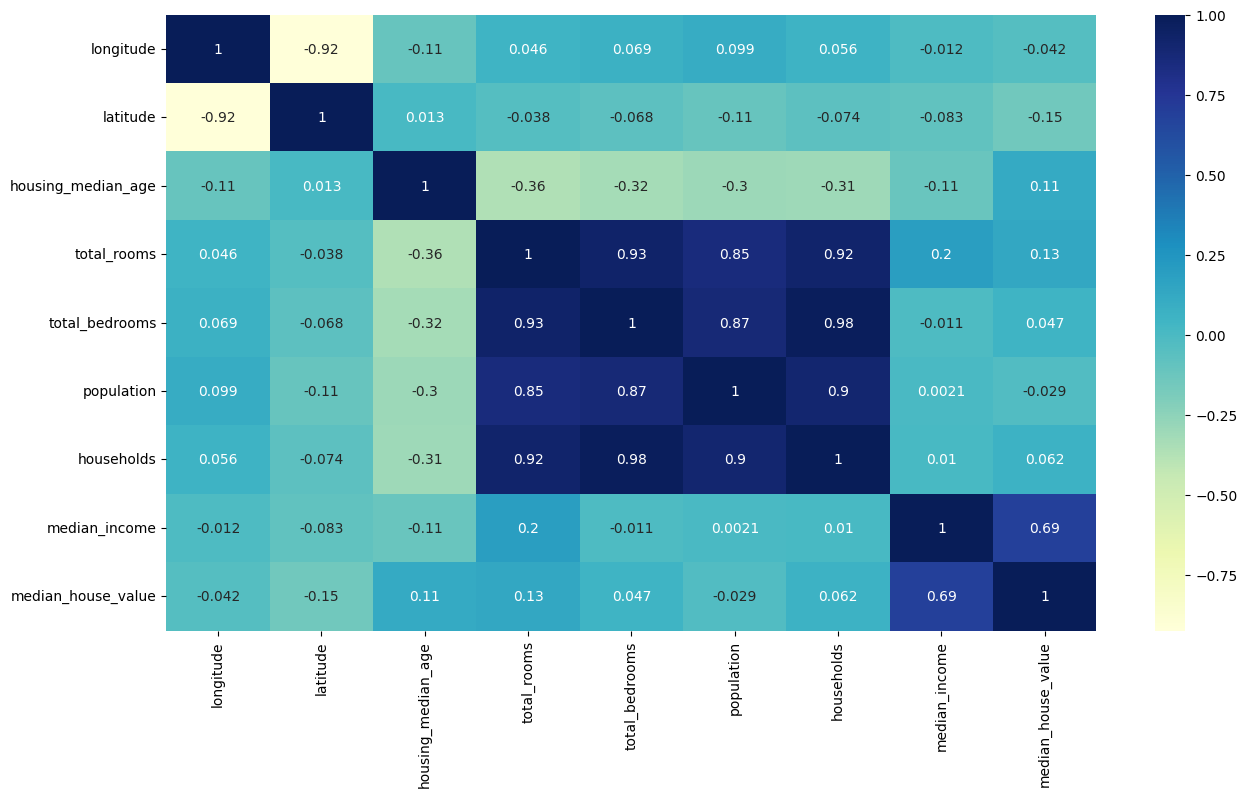

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [17]:
train_data['total_rooms']= np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms']+1)
train_data['population']= np.log(train_data['population']+1)
train_data['households']= np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

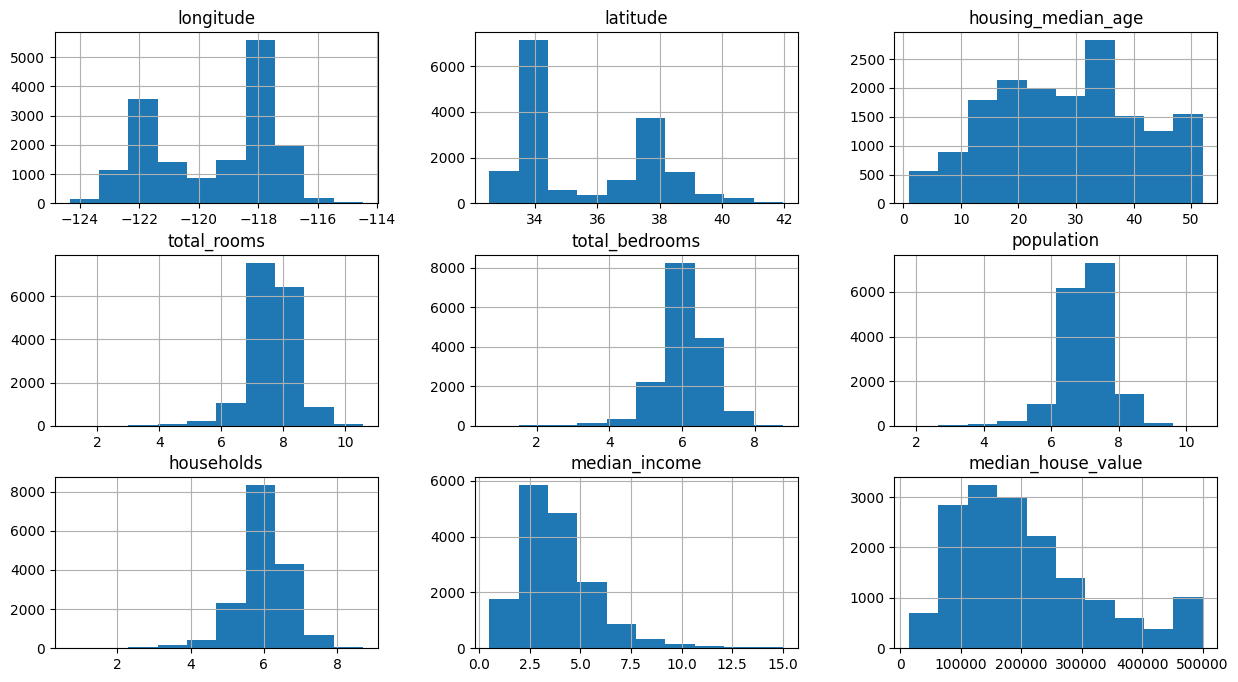

In [18]:
train_data.hist(figsize=(15, 8))

In [19]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7249
INLAND        5196
NEAR OCEAN    2090
NEAR BAY      1808
ISLAND           3
Name: count, dtype: int64

In [20]:
pd.get_dummies(train_data['ocean_proximity']).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2035,0,1,0,0,0
7633,1,0,0,0,0
19037,0,1,0,0,0
15399,1,0,0,0,0
2719,0,1,0,0,0
...,...,...,...,...,...
6726,1,0,0,0,0
3315,0,1,0,0,0
13400,0,1,0,0,0
17045,0,0,0,0,1


In [21]:
train_data.join(pd.get_dummies(train_data['ocean_proximity']).astype(int))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2035,-119.74,36.73,42.0,7.120444,5.609472,6.853299,5.568345,2.0536,INLAND,50000.0,0,1,0,0,0
7633,-118.29,33.84,34.0,7.870166,6.326149,7.242082,6.246107,5.0610,<1H OCEAN,218000.0,1,0,0,0,0
19037,-121.99,38.36,35.0,7.911691,6.113682,7.163172,6.115892,3.2768,INLAND,117600.0,0,1,0,0,0
15399,-117.20,33.20,16.0,8.391630,6.445720,7.536897,6.413459,5.5430,<1H OCEAN,286400.0,1,0,0,0,0
2719,-115.48,32.80,21.0,7.139660,5.509388,6.692084,5.480639,2.6172,INLAND,88500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,-118.11,34.12,52.0,7.991254,5.918894,7.050123,5.852202,11.5609,<1H OCEAN,500001.0,1,0,0,0,0
3315,-122.78,38.97,11.0,8.551788,6.879356,7.670895,6.675823,3.0466,INLAND,97300.0,0,1,0,0,0
13400,-117.43,34.12,7.0,8.691986,6.977281,8.179760,6.976348,3.2056,INLAND,134100.0,0,1,0,0,0
17045,-122.27,37.48,26.0,8.172729,6.230481,7.239215,6.263398,8.5184,NEAR OCEAN,500001.0,0,0,0,0,1


In [22]:
train_data.join(pd.get_dummies(train_data['ocean_proximity']).astype(int)).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2035,-119.74,36.73,42.0,7.120444,5.609472,6.853299,5.568345,2.0536,50000.0,0,1,0,0,0
7633,-118.29,33.84,34.0,7.870166,6.326149,7.242082,6.246107,5.0610,218000.0,1,0,0,0,0
19037,-121.99,38.36,35.0,7.911691,6.113682,7.163172,6.115892,3.2768,117600.0,0,1,0,0,0
15399,-117.20,33.20,16.0,8.391630,6.445720,7.536897,6.413459,5.5430,286400.0,1,0,0,0,0
2719,-115.48,32.80,21.0,7.139660,5.509388,6.692084,5.480639,2.6172,88500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,-118.11,34.12,52.0,7.991254,5.918894,7.050123,5.852202,11.5609,500001.0,1,0,0,0,0
3315,-122.78,38.97,11.0,8.551788,6.879356,7.670895,6.675823,3.0466,97300.0,0,1,0,0,0
13400,-117.43,34.12,7.0,8.691986,6.977281,8.179760,6.976348,3.2056,134100.0,0,1,0,0,0
17045,-122.27,37.48,26.0,8.172729,6.230481,7.239215,6.263398,8.5184,500001.0,0,0,0,0,1


In [23]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity']).astype(int)).drop(['ocean_proximity'], axis=1)

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2035,-119.74,36.73,42.0,7.120444,5.609472,6.853299,5.568345,2.0536,50000.0,0,1,0,0,0
7633,-118.29,33.84,34.0,7.870166,6.326149,7.242082,6.246107,5.0610,218000.0,1,0,0,0,0
19037,-121.99,38.36,35.0,7.911691,6.113682,7.163172,6.115892,3.2768,117600.0,0,1,0,0,0
15399,-117.20,33.20,16.0,8.391630,6.445720,7.536897,6.413459,5.5430,286400.0,1,0,0,0,0
2719,-115.48,32.80,21.0,7.139660,5.509388,6.692084,5.480639,2.6172,88500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,-118.11,34.12,52.0,7.991254,5.918894,7.050123,5.852202,11.5609,500001.0,1,0,0,0,0
3315,-122.78,38.97,11.0,8.551788,6.879356,7.670895,6.675823,3.0466,97300.0,0,1,0,0,0
13400,-117.43,34.12,7.0,8.691986,6.977281,8.179760,6.976348,3.2056,134100.0,0,1,0,0,0
17045,-122.27,37.48,26.0,8.172729,6.230481,7.239215,6.263398,8.5184,500001.0,0,0,0,0,1


<Axes: >

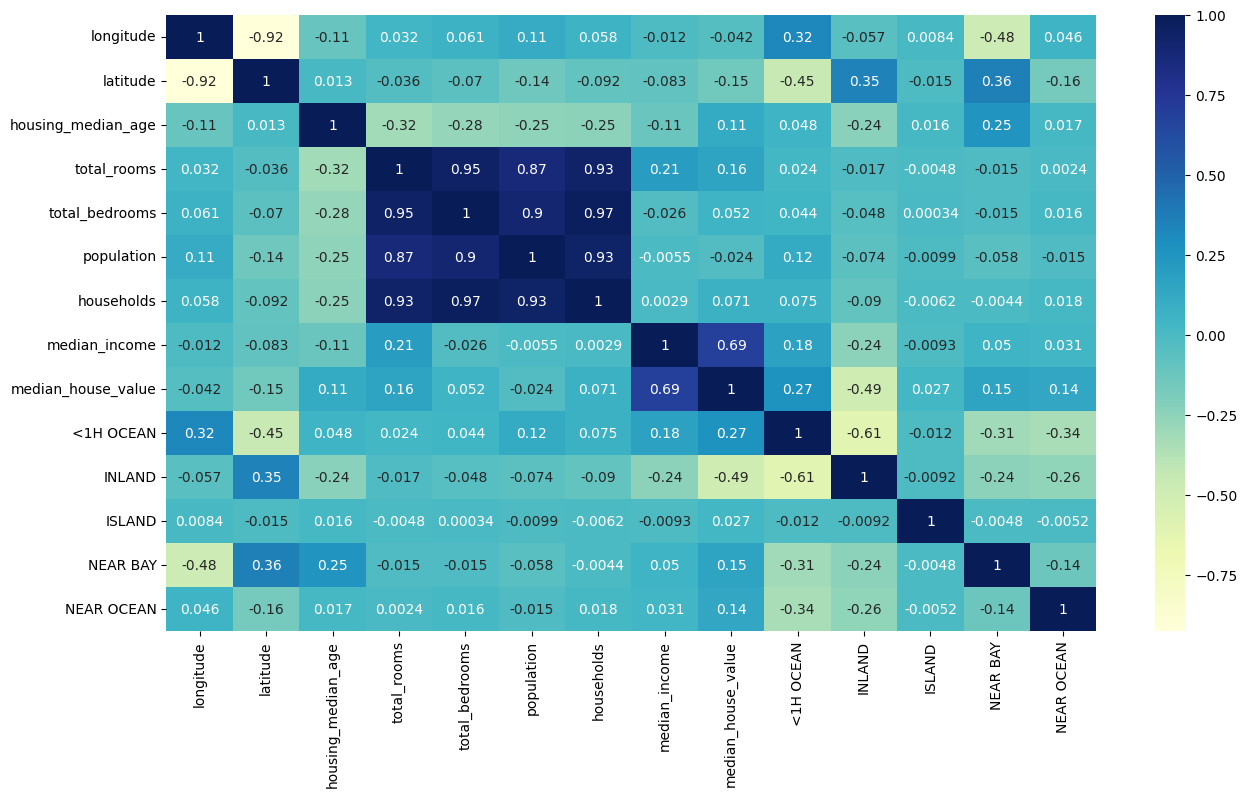

In [25]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

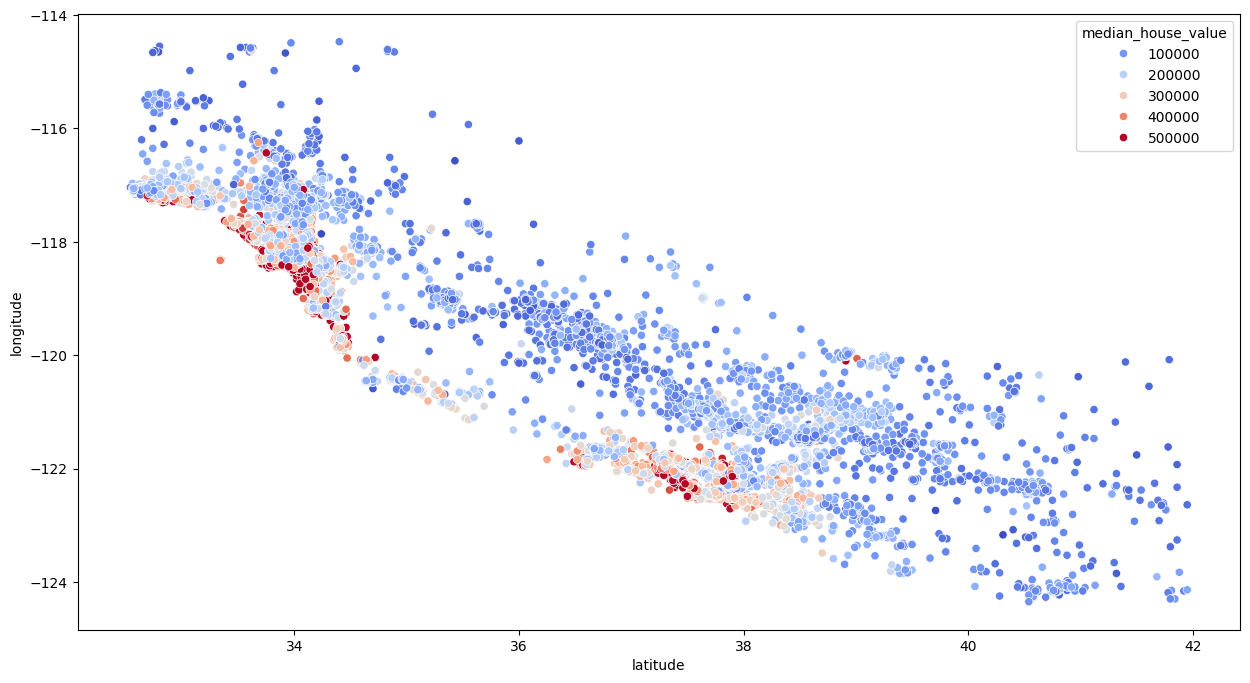

In [26]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [27]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

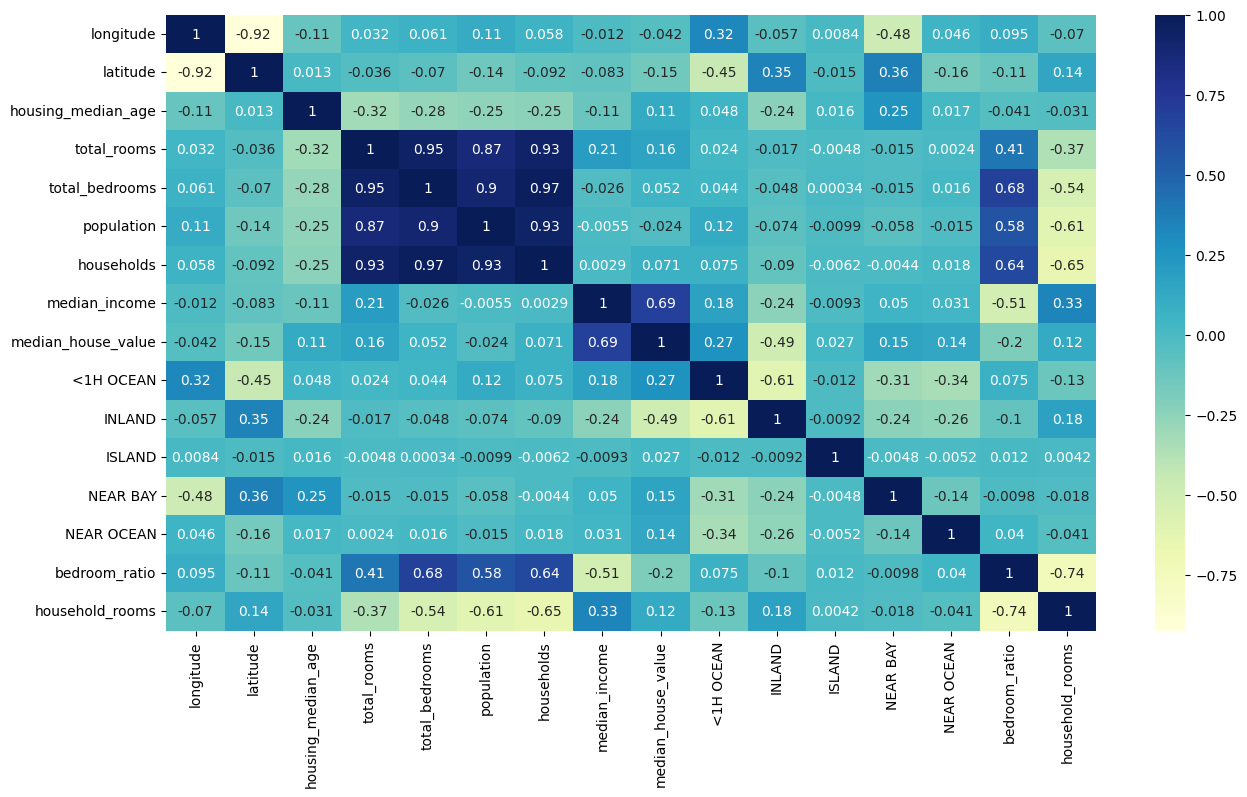

In [28]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [30]:
LinearRegression()

LinearRegression()

In [31]:
test_data = X_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms']+1)
test_data['population']= np.log(test_data['population']+1)
test_data['households']= np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity']).astype(int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [32]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [33]:
X_test_s = scaler.transform(X_test)

In [34]:
reg.score(X_test_s, y_test)

0.6612806261791306

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [36]:
forest.score(X_test_s, y_test)

0.8151409236347694